# Project_MAAC

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
import statsmodels.formula.api as smf
import math
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('data.csv', sep=';') 

## Data Cleaning & Preparation

### Binning the catogorical data

In [3]:
data['education'] = data['education'].apply(lambda x:'Primary' if 'basic' in x else 'Primary' if 'illiterate' in x else 'Secondary' if 'high.school' in x else 'Secondary' if 'professional.course' in x else 'Tertiary' if 'university.degree' in x else x)
data['job'] = data['job'].apply(lambda x:'Employed' if 'admin.' in x else 'Employed' if 'blue-collar' in x else 'Employed' if 'technician' in x else 'Employed' if 'services' in x else 'Employed' if 'management' in x else 'Employed' if 'self-employed' in x else 'Employed' if 'entrepreneur' in x else 'Unemployed' if 'retired' in x else 'Unemployed' if 'unemployed' in x else 'Unemployed' if 'housemaid' in x else 'Unemployed' if 'student' in x else x)
data['marital'] = data['marital'].apply(lambda x:'single' if 'divorce' in x else x)
data['poutcome'] = data['poutcome'].apply(lambda x:'failure' if 'nonexistent' in x else x)

### Cleaning the missing values

In [4]:
data['education']=data['education'].replace('unknown',np.NaN)
data['marital']=data['marital'].replace('unknown',np.NaN)
data['housing']=data['housing'].replace('unknown',np.NaN)
data['loan']=data['loan'].replace('unknown',np.NaN)
data['job']=data['job'].replace('unknown',np.NaN)

data.drop(['default'], axis=1, inplace = True)
data.dropna(axis=0, inplace=True)

In [5]:
data['y_dum']= data['y'].map({'no': 0, 'yes': 1})

In [6]:
data.drop(['y'], axis=1, inplace = True)

In [7]:
data['poutcome_success'] = data['poutcome'].map({'failure': 0, 'success': 1})

## Rename the column

In [8]:
data = data.rename(columns={'emp.var.rate': 'emp_var_rate', 'cons.price.idx': 'cons_price_idx', 'cons.conf.idx': 'cons_conf_idx', 'nr.employed': 'nr_employed'})

## Split the Dataset

In [9]:
# Creating training and testing datasets
np.random.seed(2)
train = data.sample(round(data.shape[0]*0.8))
test = data.drop(train.index)

In [10]:
train.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum,poutcome_success
398,45,Employed,single,Tertiary,no,yes,cellular,may,fri,133,...,999,0,failure,-1.8,92.893,-46.2,1.250,5099.1,0,0
526,38,Employed,married,Tertiary,no,no,telephone,may,tue,477,...,999,0,failure,1.1,93.994,-36.4,4.857,5191.0,0,0
3707,60,Unemployed,married,Secondary,no,no,cellular,may,thu,181,...,6,1,success,-1.8,93.876,-40.0,0.699,5008.7,1,1
3687,30,Employed,single,Tertiary,no,no,cellular,sep,thu,327,...,999,0,failure,-1.1,94.199,-37.5,0.879,4963.6,1,0
618,31,Employed,married,Tertiary,no,no,telephone,may,wed,197,...,999,0,failure,1.1,93.994,-36.4,4.859,5191.0,0,0


In [11]:
test.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,...,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum,poutcome_success
6,32,Employed,single,Tertiary,yes,no,cellular,sep,mon,290,...,999,0,failure,-1.1,94.199,-37.5,0.879,4963.6,0,0
10,25,Employed,single,Primary,yes,no,cellular,jul,thu,301,...,999,0,failure,1.4,93.918,-42.7,4.958,5228.1,0,0
20,55,Employed,married,Primary,yes,no,cellular,jul,tue,326,...,999,0,failure,1.4,93.918,-42.7,4.962,5228.1,0,0
25,38,Employed,married,Secondary,yes,no,cellular,aug,mon,479,...,999,0,failure,1.4,93.444,-36.1,4.965,5228.1,1,0
26,36,Employed,single,Secondary,no,no,telephone,may,wed,446,...,999,0,failure,1.1,93.994,-36.4,4.856,5191.0,0,0


## Data Preparation

### Check Missing Value

In [12]:
data.isnull().sum()

age                 0
job                 0
marital             0
education           0
housing             0
loan                0
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp_var_rate        0
cons_price_idx      0
cons_conf_idx       0
euribor3m           0
nr_employed         0
y_dum               0
poutcome_success    0
dtype: int64

### Check VIF


In [72]:
train_dummies=pd.get_dummies(train.iloc[:,0:])


In [73]:
X = train_dummies[['age', 'duration','campaign','pdays','previous', 'euribor3m', 'job_Employed', 'marital_married', 'education_Primary', 'housing_no', 'loan_no', 'contact_cellular', 'month_mar', 'poutcome_failure', 'day_of_week_fri',"cons_conf_idx"]]




In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def vif(x):
    X = add_constant(X)
    vif_data = pd.DataFrame()
    vif_data["y_dum"] = X.columns

    for i in range(len(X.columns)):
        vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data)

                y_dum         VIF
0               const  171.395633
1                 age    1.178835
2            duration    1.015366
3            campaign    1.037066
4            previous    1.642924
5           euribor3m    1.572630
6        job_Employed    1.087303
7     marital_married    1.104787
8   education_Primary    1.082696
9          housing_no    1.014208
10            loan_no    1.007484
11   contact_cellular    1.230216
12          month_mar    1.033893
13   poutcome_failure    1.453143
14    day_of_week_fri    1.003229
15      cons_conf_idx    1.212204


## EDA

### Visualization Heatmap

<AxesSubplot:>

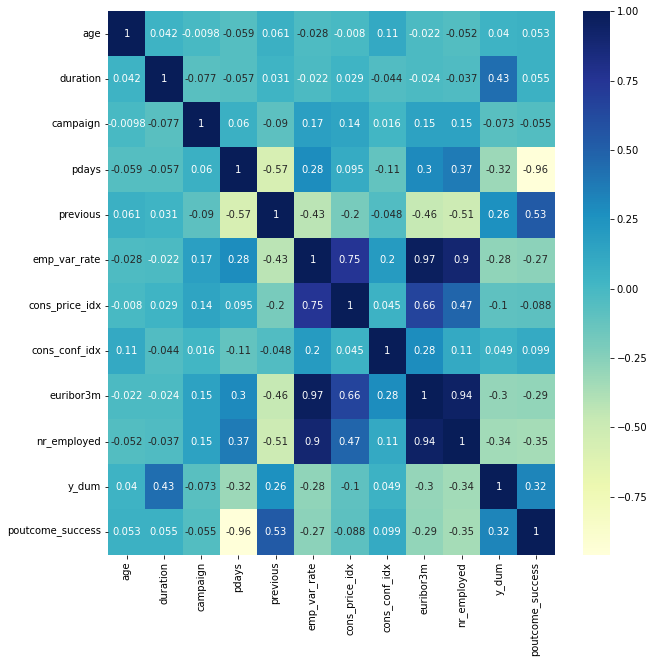

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

## Visualizations with Individual Predictors
### Visualizations for Numerical Predictors

[Text(0.5, 0, 'euribor3m_idx'), Text(0, 0.5, 'subscription_rate')]

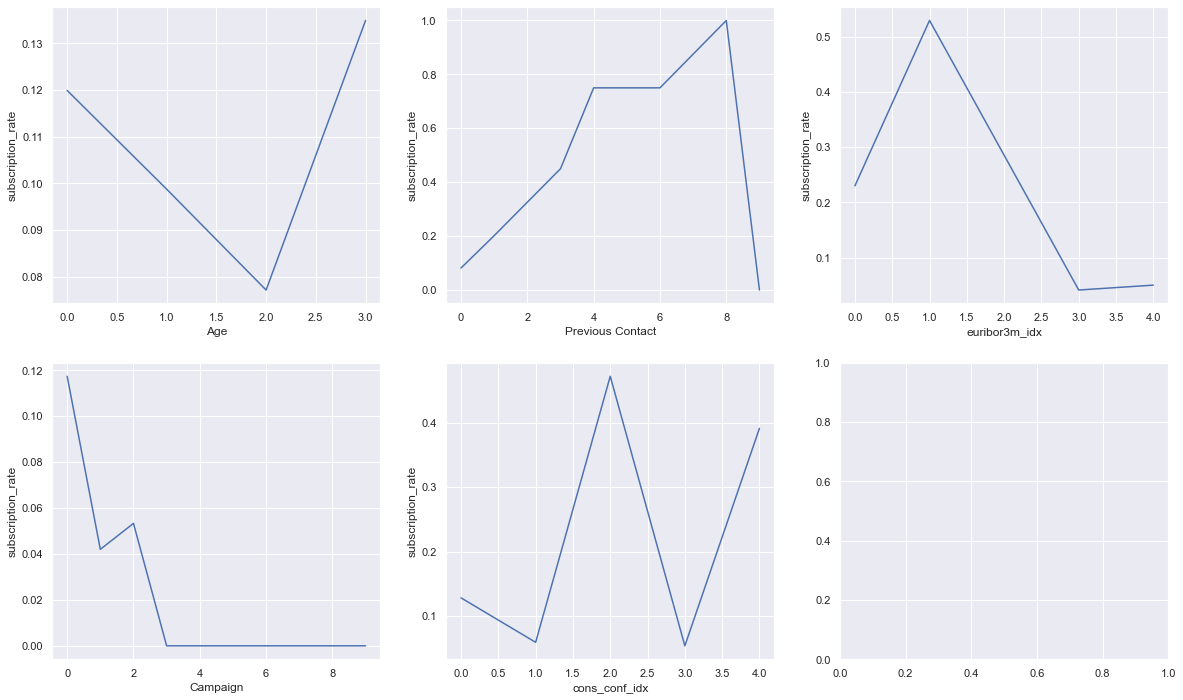

In [17]:
sns.set(rc={'figure.figsize':(20,12)})
fig, axes = plt.subplots(nrows=2, ncols=3)
#Plotting individual subplots

#Binning Age
binned_age = pd.qcut(train['age'],4,retbins=True)
train['age_binned'] = binned_age[0]
age_data = train.groupby('age_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Age Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_age = sns.lineplot(x = age_data.index, y= age_data['subscription_rate'], ax=axes[0,0])
ax_age.set(xlabel='Age', ylabel='subscription_rate')

#Binning number of previous contacts
binned_previous = pd.cut(train['previous'],10, retbins=True, duplicates='drop')
train['previous_binned'] = binned_previous[0]
previous_data = train.groupby('previous_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Previous Contact Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_previous = sns.lineplot(x = previous_data.index, y= previous_data['subscription_rate'], ax = axes[0,1])
ax_previous.set(xlabel='Previous Contact', ylabel='subscription_rate')


#Binning number of Campaign
binned_campaign = pd.cut(train['campaign'],10, retbins=True, duplicates='drop')
train['campaign_binned'] = binned_campaign[0]
campaign_data = train.groupby('campaign_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Previous Contact Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_campaign = sns.lineplot(x = campaign_data.index, y= campaign_data['subscription_rate'], ax = axes[1,0])
ax_campaign.set(xlabel='Campaign', ylabel='subscription_rate')

#Binning number of Campaign
binned_cons_conf_idx = pd.cut(train['cons_conf_idx'],5, retbins=True, duplicates='drop')
train['cons_conf_idx_binned'] = binned_cons_conf_idx[0]
cons_conf_idx_data = train.groupby('cons_conf_idx_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Previous Contact Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_cons_conf_idx = sns.lineplot(x = cons_conf_idx_data.index, y= cons_conf_idx_data['subscription_rate'], ax = axes[1,1])
ax_cons_conf_idx.set(xlabel='cons_conf_idx', ylabel='subscription_rate')

#Binning euribor 3 month rate
binned_euribor3m = pd.cut(train['euribor3m'],5, retbins=True, duplicates='drop')
train['euribor3m_binned'] = binned_euribor3m[0]
euribor3m_data = train.groupby('euribor3m_binned')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
#Previous Contact Graph
sns.set(rc={'figure.figsize':(10,6)})
ax_euribor3m = sns.lineplot(x = euribor3m_data.index, y= euribor3m_data['subscription_rate'], ax = axes[0,2])
ax_euribor3m.set(xlabel='euribor3m_idx', ylabel='subscription_rate')



### Visualization for Categorical Variables

[Text(0.5, 0, 'housing'), Text(0, 0.5, 'subscription_rate')]

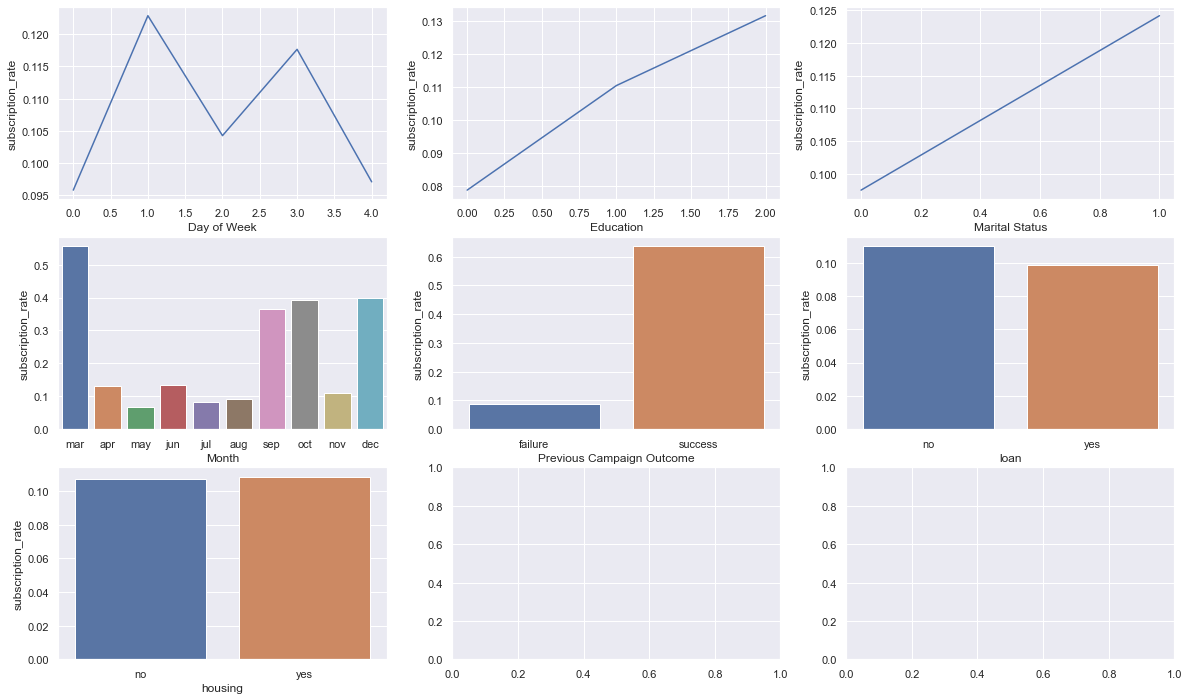

In [18]:
sns.set(rc={'figure.figsize':(20,12)})
fig, axes = plt.subplots(nrows=3, ncols=3)
#Plotting individual subplots

#Day of Week Graph
day_data = train.groupby('day_of_week')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_day = sns.lineplot(x = day_data.index, y= day_data['subscription_rate'], ax = axes[0,0])
ax_day.set(xlabel='Day of Week', ylabel='subscription_rate')

#Education Graph
edu_data = train.groupby('education')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_edu = sns.lineplot(x = edu_data.index, y= edu_data['subscription_rate'], ax = axes[0,1])
ax_edu.set(xlabel='Education', ylabel='subscription_rate')

#Marital Status Graph
marital_data = train.groupby('marital')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')]).reset_index(drop=False)
ax_marital = sns.lineplot(x = marital_data.index, y= marital_data['subscription_rate'], ax = axes[0,2])
ax_marital.set(xlabel='Marital Status', ylabel='subscription_rate')

#Month Graph
month_data = train.groupby('month')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')])
ax_month = sns.barplot(x = month_data.index, y= month_data['subscription_rate'], order = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec'], ax = axes[1,0])
ax_month.set(xlabel='Month', ylabel='subscription_rate')

#Previous Campaign Graph
poutcome_data = train.groupby('poutcome')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')])
ax_poutcome = sns.barplot(x = poutcome_data.index, y= poutcome_data['subscription_rate'],ax = axes[1,1])
ax_poutcome.set(xlabel='Previous Campaign Outcome', ylabel='subscription_rate')

#Loan Graph
loan_data = train.groupby('loan')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')])
ax_loan = sns.barplot(x = loan_data.index, y= loan_data['subscription_rate'],ax = axes[1,2])
ax_loan.set(xlabel='loan', ylabel='subscription_rate')

#Housing Graph
housing_data = train.groupby('housing')['y_dum'].agg([('subscription_rate','mean'),('nobs','count')])
ax_housing = sns.barplot(x = housing_data.index, y= housing_data['subscription_rate'],ax = axes[2,0])
ax_housing.set(xlabel='housing', ylabel='subscription_rate')

## Observations from Visualizations
**Age**:A quadratic transformation of age seems to better fit for "Age"

**Day of Week**:

**Education**

**Previous Contact**

## Model

In [19]:
from sklearn.metrics import roc_curve, auc

#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

### Baseline Model

In [20]:
train.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y_dum', 'poutcome_success', 'age_binned',
       'previous_binned', 'campaign_binned', 'cons_conf_idx_binned',
       'euribor3m_binned'],
      dtype='object')

In [21]:
logit_model_Baseline = sm.logit(formula = 'y_dum~age+job+marital+education+housing+loan+contact+month+day_of_week+campaign+pdays+previous+poutcome+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
logit_model_Baseline.summary()

Optimization terminated successfully.
         Current function value: 0.268679
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3018
Method:                           MLE   Df Model:                           30
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.2146
Time:                        21:24:22   Log-Likelihood:                -819.20
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 5.643e-76
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -252.2508    117.103     -2.154      0.031    -481.769     -22.732
job[T.Unemployed]          0.0749      0.201      0.373      0.709      -0.319       0.469
marital[T.single]          0.0358      0.142      0.252      0.801      -0.243       0.314
education[T.Secondary]     0.1176      0.177      0.666      0.505      -0.228       0.464
education[T.Tertiary]      0.1842      0.182      1.009      0.313      -0.173       0.542
housing[T.yes]            -0.0954      0.135     -0.708      0.479      -0.359       0.169
loan[T.yes]               -0.0651      0.184     -0.353      0.724      -0.426       0.296
contact[T.telephone]      -1.2796      0.297     -4.307      0.000      -1.862      -0.697
month[T.aug]               0.2871      0.427      0.672      0.502      -0.550       1.124
month[T.dec]               0.5921      0.711      0.833      0.405      -0.802       1.986
month[T.jul]               0.2148      0.374      0.575      0.566      -0.518       0.947
month[T.jun]               0.2840      0.430      0.661      0.508      -0.558       1.126
month[T.mar]               2.1855      0.531      4.113      0.000       1.144       3.227
month[T.may]               0.0864      0.310      0.278      0.781      -0.522       0.694
month[T.nov]              -0.0007      0.418     -0.002      0.999      -0.821       0.819
month[T.oct]               0.5552      0.529      1.050      0.294      -0.482       1.592
month[T.sep]               0.3938      0.601      0.655      0.512      -0.784       1.572
day_of_week[T.mon]         0.1934      0.212      0.913      0.361      -0.222       0.609
day_of_week[T.thu]         0.0085      0.220      0.039      0.969      -0.422       0.439
day_of_week[T.tue]         0.1933      0.218      0.887      0.375      -0.234       0.620
day_of_week[T.wed]         0.1603      0.224      0.715      0.475      -0.279       0.600
poutcome[T.success]        1.8038      0.798      2.259      0.024       0.239       3.369
age                        0.0014      0.006      0.220      0.826      -0.011       0.014
campaign                  -0.0627      0.038     -1.643      0.100      -0.137       0.012
pdays                      0.0002      0.001      0.299      0.765      -0.001       0.002
previous                  -0.0541      0.123     -0.438      0.661      -0.296       0.188
euribor3m                 -0.1992      0.426     -0.468      0.640      -1.033       0.635
emp_var_rate              -1.1221      0.443     -2.531      0.011      -1.991      -0.253
cons_price_idx             2.1333      0.776      2.748      0.006       0.612       3.655
cons_conf_idx              0.0676      0.027      2.481      0.013       0.014       0.121
nr_employed                0.0104      0.010      1.090      0.276      -0.008       0.029
==========================================================================================
"""

Classification accuracy = 89.2%
Precision = 50.2%
TPR or Recall = 46.2%
FNR = 53.8%
FPR = 5.6%
ROC-AUC = 79.4%


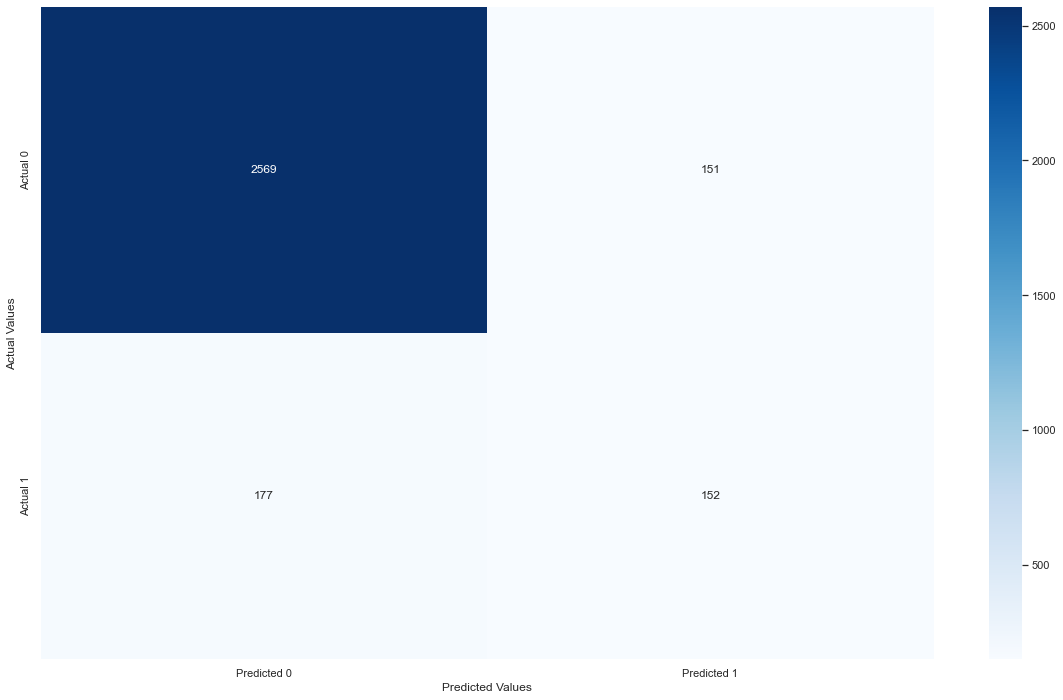

In [22]:
confusion_matrix_data(train,train.y_dum,logit_model_Baseline,0.3)

## Our Model

In [23]:
logit_model = sm.logit(formula = 'y_dum~age+job*loan+marital+education+month+day_of_week+np.log(campaign)+previous+I(previous**2)+poutcome*loan+euribor3m+cons_conf_idx+I(cons_conf_idx**2)+I(cons_conf_idx**3)', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.273152
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3019
Method:                           MLE   Df Model:                           29
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.2016
Time:                        21:24:22   Log-Likelihood:                -832.84
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 5.120e-71
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                         -51.0064     20.735     -2.460      0.014     -91.647     -10.366
job[T.Unemployed]                   0.0802      0.211      0.380      0.704      -0.334       0.494
loan[T.yes]                        -0.1300      0.207     -0.627      0.531      -0.537       0.276
marital[T.single]                   0.0646      0.141      0.459      0.646      -0.211       0.341
education[T.Secondary]              0.1153      0.175      0.657      0.511      -0.229       0.459
education[T.Tertiary]               0.2158      0.180      1.199      0.231      -0.137       0.569
month[T.aug]                        0.0516      0.374      0.138      0.890      -0.682       0.786
month[T.dec]                        0.2585      0.680      0.380      0.704      -1.074       1.591
month[T.jul]                        0.9466      0.345      2.747      0.006       0.271       1.622
month[T.jun]                        0.9670      0.343      2.817      0.005       0.294       1.640
month[T.mar]                        1.4049      0.481      2.922      0.003       0.463       2.347
month[T.may]                       -0.2501      0.292     -0.856      0.392      -0.822       0.322
month[T.nov]                        0.4000      0.338      1.185      0.236      -0.262       1.062
month[T.oct]                        1.3352      0.511      2.614      0.009       0.334       2.336
month[T.sep]                        0.1783      0.460      0.388      0.698      -0.723       1.079
day_of_week[T.mon]                  0.1435      0.210      0.682      0.495      -0.269       0.555
day_of_week[T.thu]                  0.0444      0.216      0.205      0.837      -0.380       0.468
day_of_week[T.tue]                  0.1700      0.216      0.789      0.430      -0.253       0.592
day_of_week[T.wed]                  0.1049      0.223      0.471      0.637      -0.331       0.541
poutcome[T.success]                 1.6317      0.295      5.523      0.000       1.053       2.211
job[T.Unemployed]:loan[T.yes]       0.1795      0.503      0.357      0.721      -0.806       1.165
poutcome[T.success]:loan[T.yes]    -0.2642      0.612     -0.432      0.666      -1.463       0.935
age                                 0.0017      0.006      0.269      0.788      -0.011       0.014
np.log(campaign)                   -0.1456      0.108     -1.351      0.177      -0.357       0.066
previous                           -0.1636      0.232     -0.705      0.481      -0.618       0.291
I(previous ** 2)                    0.0795      0.073      1.087      0.277      -0.064       0.223
euribor3m                          -0.5263      0.053     -9.899      0.000      -0.630      -0.422
cons_conf_idx                      -3.8791      1.635     -2.372      0.018      -7.084      -0.674
I(cons_conf_idx ** 2)              -0.0980      0.042     -2.320      0.020      -0.181      -0.015
I(cons_conf_idx ** 3)              -0.000

Classification accuracy = 88.8%
Precision = 47.7%
TPR or Recall = 41.0%
FNR = 59.0%
FPR = 5.4%
ROC-AUC = 78.5%


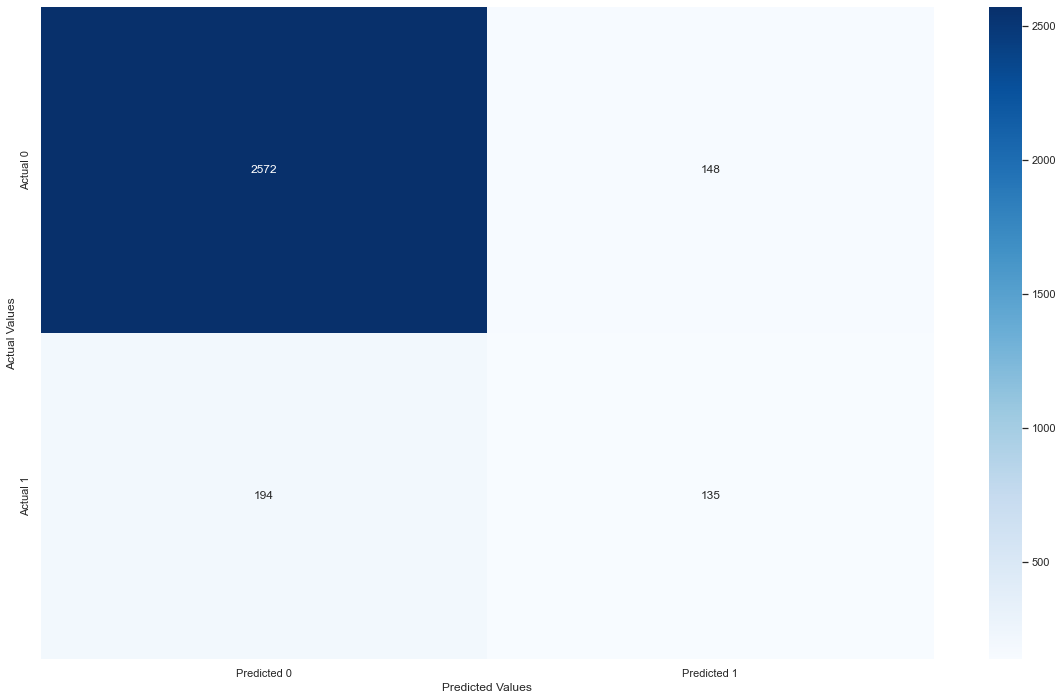

In [24]:
confusion_matrix_data(train,train.y_dum,logit_model,0.3)

Classification accuracy = 88.7%
Precision = 48.8%
TPR or Recall = 46.4%
FNR = 53.6%
FPR = 6.0%
ROC-AUC = 76.3%


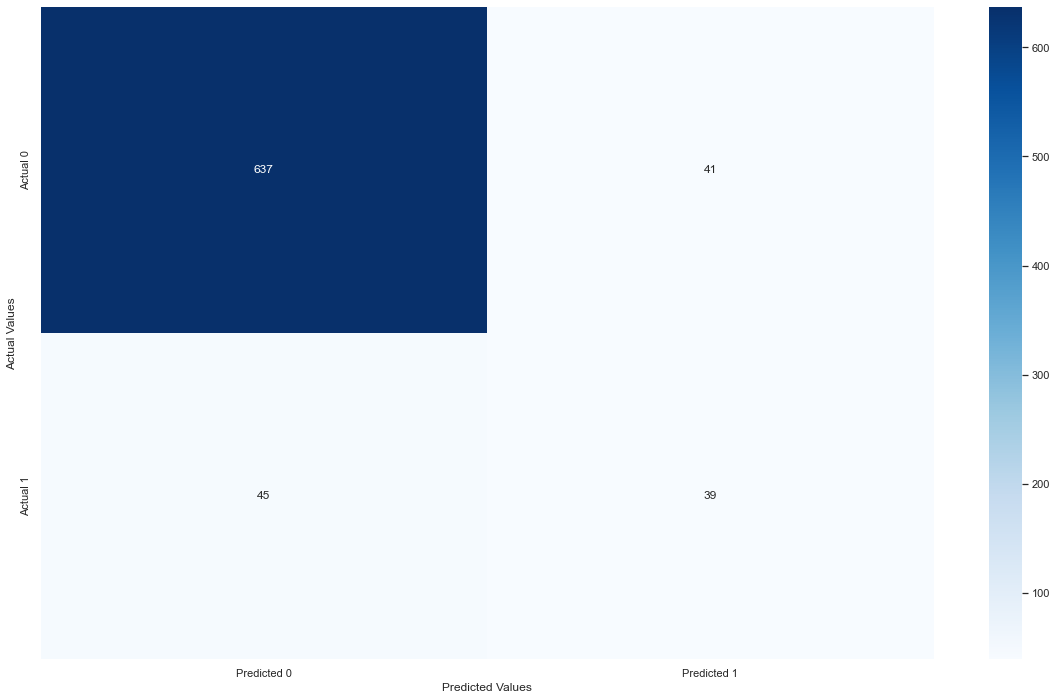

In [25]:
confusion_matrix_data(test,test.y_dum,logit_model,0.3)

0.7846722465581978


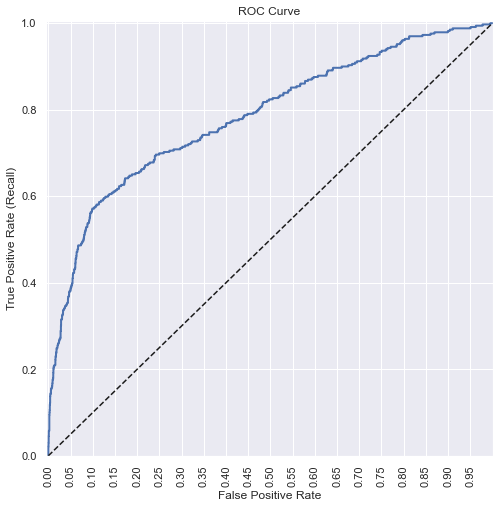

In [26]:
y=train.y_dum
ypred = logit_model.predict(train)
fpr, tpr, auc_thresholds = roc_curve(y, ypred)
print(auc(fpr, tpr))# AUC of ROC
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

fpr, tpr, auc_thresholds = roc_curve(y, ypred)
plot_roc_curve(fpr, tpr)

## Taking account for class imbalance

In [27]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTENC


Text(0.5, 1.0, 'Has the client subscribed a term deposit?')

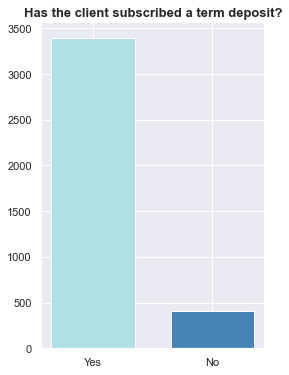

In [29]:
Subscription = {'Yes':3398, 'No':413}
YN = list(Subscription.keys())
Counts = list(Subscription.values())
  
fig = plt.figure(figsize = (4, 6))

# creating the bar plot
plt.bar(YN, Counts, color = ['powderblue', 'steelblue'], width = 0.7)
 
plt.title("Has the client subscribed a term deposit?",fontdict={'fontsize': '13', 'fontweight' : 'bold'})

In [30]:
X=data.iloc[:,:19]
y=data.iloc[:,19]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [31]:
## Balancing the train data
sm_nc = SMOTENC(categorical_features=[1,2,3,4,5,6,7,8,13], random_state=20)
X_train_res, y_train_res = sm_nc.fit_resample(X_train, y_train)

Y = pd.DataFrame(y_train_res, columns=["y_dum"])
train_smote = pd.concat([X_train_res, Y], axis = 1) 
train_smote = train_smote.reindex(columns=["age", "job", "marital", "education", "housing", "loan", "contact", "month", 'day_of_week', "duration", "campaign", "pdays", "previous", "poutcome", "emp_var_rate", "cons_price_idx", "cons_conf_idx","euribor3m", "nr_employed", "y_dum"])
train_smote.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
0,32,Unemployed,single,Tertiary,no,no,telephone,may,fri,21,3,999,0,failure,1.1,93.994,-36.4,4.855,5191.0,0
1,51,Employed,married,Secondary,yes,no,telephone,jun,mon,81,1,999,0,failure,1.4,94.465,-41.8,4.961,5228.1,0
2,31,Unemployed,single,Tertiary,yes,no,cellular,jul,tue,309,1,6,3,success,-1.7,94.215,-40.3,0.835,4991.6,1
3,26,Employed,married,Primary,yes,no,telephone,jun,wed,71,1,999,0,failure,1.4,94.465,-41.8,4.864,5228.1,0
4,31,Employed,single,Primary,no,no,cellular,jul,wed,1432,5,999,0,failure,1.4,93.918,-42.7,4.957,5228.1,0


In [32]:
## Balancing the test data
sm_nc = SMOTENC(categorical_features=[1,2,3,4,5,6,7,8,13], random_state=20)
X_test_res, y_test_res = sm_nc.fit_resample(X_test, y_test)

Y = pd.DataFrame(y_test_res, columns=["y_dum"])
test_smote = pd.concat([X_test_res, Y], axis = 1) 
test_smote = test_smote.reindex(columns=["age", "job", "marital", "education", "housing", "loan", "contact", "month", 'day_of_week', "duration", "campaign", "pdays", "previous", "poutcome", "emp_var_rate", "cons_price_idx", "cons_conf_idx","euribor3m", "nr_employed", "y_dum"])
test_smote.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y_dum
0,53,Employed,single,Primary,no,no,cellular,jul,fri,127,3,999,0,failure,1.4,93.918,-42.7,4.957,5228.1,0
1,34,Employed,married,Primary,no,yes,telephone,jul,mon,164,3,999,0,failure,1.4,93.918,-42.7,4.962,5228.1,0
2,34,Employed,married,Secondary,yes,no,telephone,may,mon,210,2,999,0,failure,1.1,93.994,-36.4,4.858,5191.0,0
3,45,Employed,married,Primary,yes,yes,cellular,aug,mon,187,1,999,0,failure,1.4,93.444,-36.1,4.965,5228.1,0
4,56,Employed,married,Primary,yes,no,telephone,jun,tue,941,3,999,0,failure,1.4,94.465,-41.8,4.864,5228.1,1


### Testing SMOTE for Baseline Model

In [33]:
logit_model_s = sm.logit(formula = 'y_dum~age+job+marital+education+housing+loan+contact+month+day_of_week+campaign+pdays+previous+poutcome+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train_smote).fit()
logit_model_s.summary()

Optimization terminated successfully.
         Current function value: 0.480802
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 5450
Model:                          Logit   Df Residuals:                     5419
Method:                           MLE   Df Model:                           30
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.3063
Time:                        21:24:31   Log-Likelihood:                -2620.4
converged:                       True   LL-Null:                       -3777.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -114.0390     34.345     -3.320      0.001    -181.355     -46.723
job[T.Unemployed]         -1.0650      0.138     -7.716      0.000      -1.336      -0.795
marital[T.single]         -0.1732      0.074     -2.340      0.019      -0.318      -0.028
education[T.Secondary]     0.3292      0.087      3.766      0.000       0.158       0.501
education[T.Tertiary]      0.2184      0.093      2.352      0.019       0.036       0.400
housing[T.yes]             0.2101      0.071      2.955      0.003       0.071       0.349
loan[T.yes]               -1.5933      0.135    -11.826      0.000      -1.857      -1.329
contact[T.telephone]      -1.3672      0.133    -10.281      0.000      -1.628      -1.107
month[T.aug]               0.3957      0.201      1.964      0.050       0.001       0.791
month[T.dec]               0.7729      0.566      1.365      0.172      -0.337       1.883
month[T.jul]               0.2869      0.191      1.501      0.133      -0.088       0.662
month[T.jun]               0.5987      0.189      3.166      0.002       0.228       0.969
month[T.mar]               0.9237      0.366      2.522      0.012       0.206       1.641
month[T.may]               0.0446      0.155      0.287      0.774      -0.260       0.349
month[T.nov]              -0.7981      0.203     -3.923      0.000      -1.197      -0.399
month[T.oct]               1.0237      0.288      3.553      0.000       0.459       1.588
month[T.sep]              -0.7118      0.322     -2.208      0.027      -1.344      -0.080
day_of_week[T.mon]         0.1494      0.106      1.412      0.158      -0.058       0.357
day_of_week[T.thu]        -0.1330      0.108     -1.227      0.220      -0.346       0.080
day_of_week[T.tue]        -0.0524      0.112     -0.466      0.641      -0.273       0.168
day_of_week[T.wed]        -0.1725      0.117     -1.478      0.139      -0.401       0.056
poutcome[T.success]        3.6485      0.680      5.364      0.000       2.315       4.982
age                        0.0082      0.004      2.257      0.024       0.001       0.015
campaign                  -0.2907      0.027    -10.946      0.000      -0.343      -0.239
pdays                      0.0006      0.001      0.805      0.421      -0.001       0.002
previous                  -0.9108      0.094     -9.638      0.000      -1.096      -0.726
euribor3m                  0.6955      0.209      3.335      0.001       0.287       1.104
emp_var_rate              -1.2100      0.162     -7.479      0.000      -1.527      -0.893
cons_price_idx             1.5597      0.217      7.173      0.000       1.133       1.986
cons_conf_idx              0.0395      0.014      2.765      0.006       0.012       0.068
nr_employed               -0.0064      0.003     -1.915      0.055      -0.013       0.000
==========================================================================================
"""

Classification accuracy = 69.2%
Precision = 63.8%
TPR or Recall = 88.6%
FNR = 11.4%
FPR = 50.2%
ROC-AUC = 84.7%


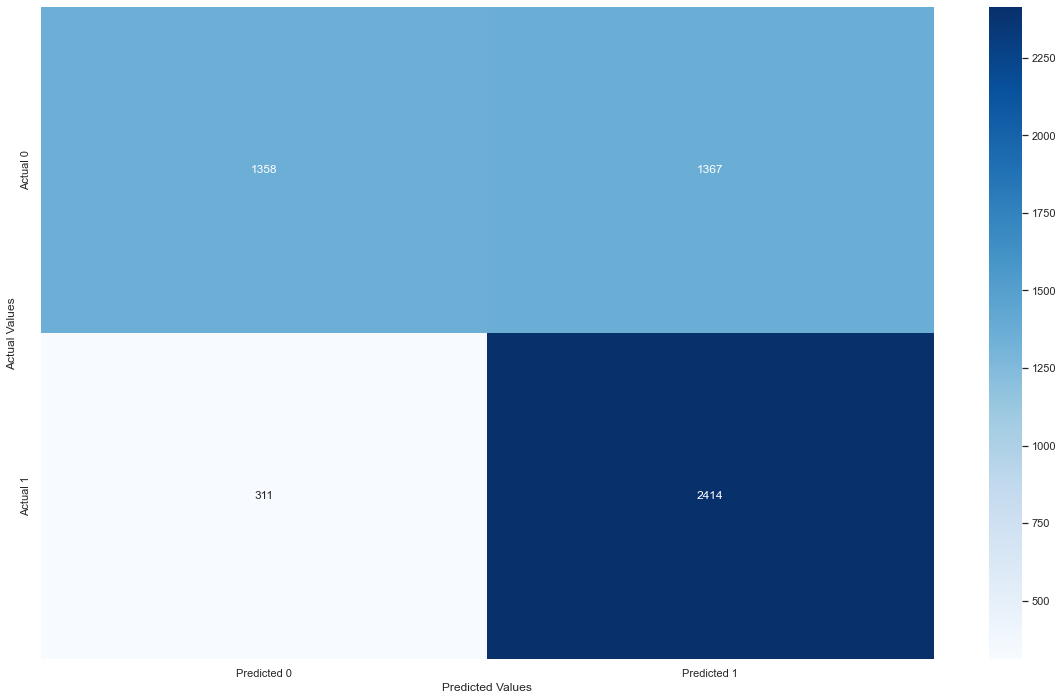

In [34]:
confusion_matrix_data(train_smote,train_smote.y_dum,logit_model_s,0.3)

Classification accuracy = 64.7%
Precision = 60.5%
TPR or Recall = 85.0%
FNR = 15.0%
FPR = 55.6%
ROC-AUC = 79.9%


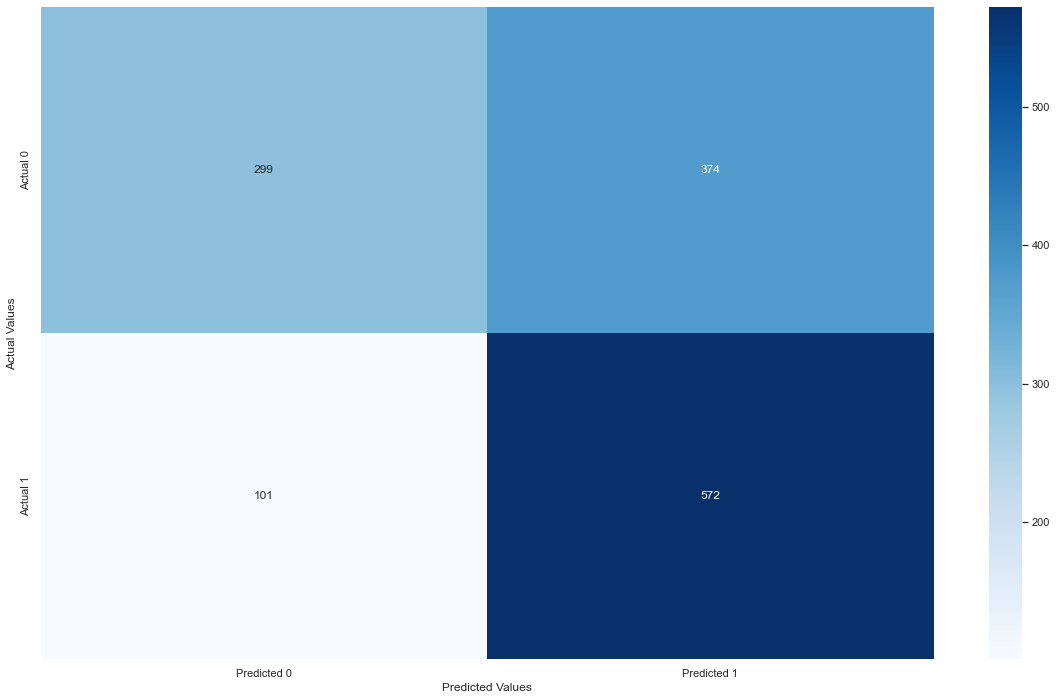

In [35]:
confusion_matrix_data(test_smote,test_smote.y_dum,logit_model_s,0.3)

## Lasso

In [105]:
X = train_dummies
scaler = StandardScaler()


In [106]:
alphas = 10**np.linspace(0,-2.5,200)*0.5
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000)
lassocv.fit(X, train.y_dum)

lassocv.alpha_

0.0015811388300841897

In [107]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X, train.y_dum)

Lasso(alpha=0.0015811388300841897)

In [108]:
#Finding the lasso coefficients for increasing values of the tuning parameter
lasso = Lasso(max_iter = 10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X, train.y_dum)
    coefs.append(lasso.coef_)

In [109]:
X.columns[lasso.coef_!=0]

Index(['duration', 'pdays', 'cons_conf_idx', 'nr_employed', 'y_dum'], dtype='object')

## Interaction and Transformation Visualization

### Identify highly correlated predictors

In [112]:
train.corrwith(train.y_dum).sort_values()

nr_employed        -0.343831
pdays              -0.323217
euribor3m          -0.295870
emp_var_rate       -0.282032
cons_price_idx     -0.100081
campaign           -0.072612
age                 0.040053
cons_conf_idx       0.048609
previous            0.262435
poutcome_success    0.324309
duration            0.426153
y_dum               1.000000
dtype: float64

### visualize potential correlations

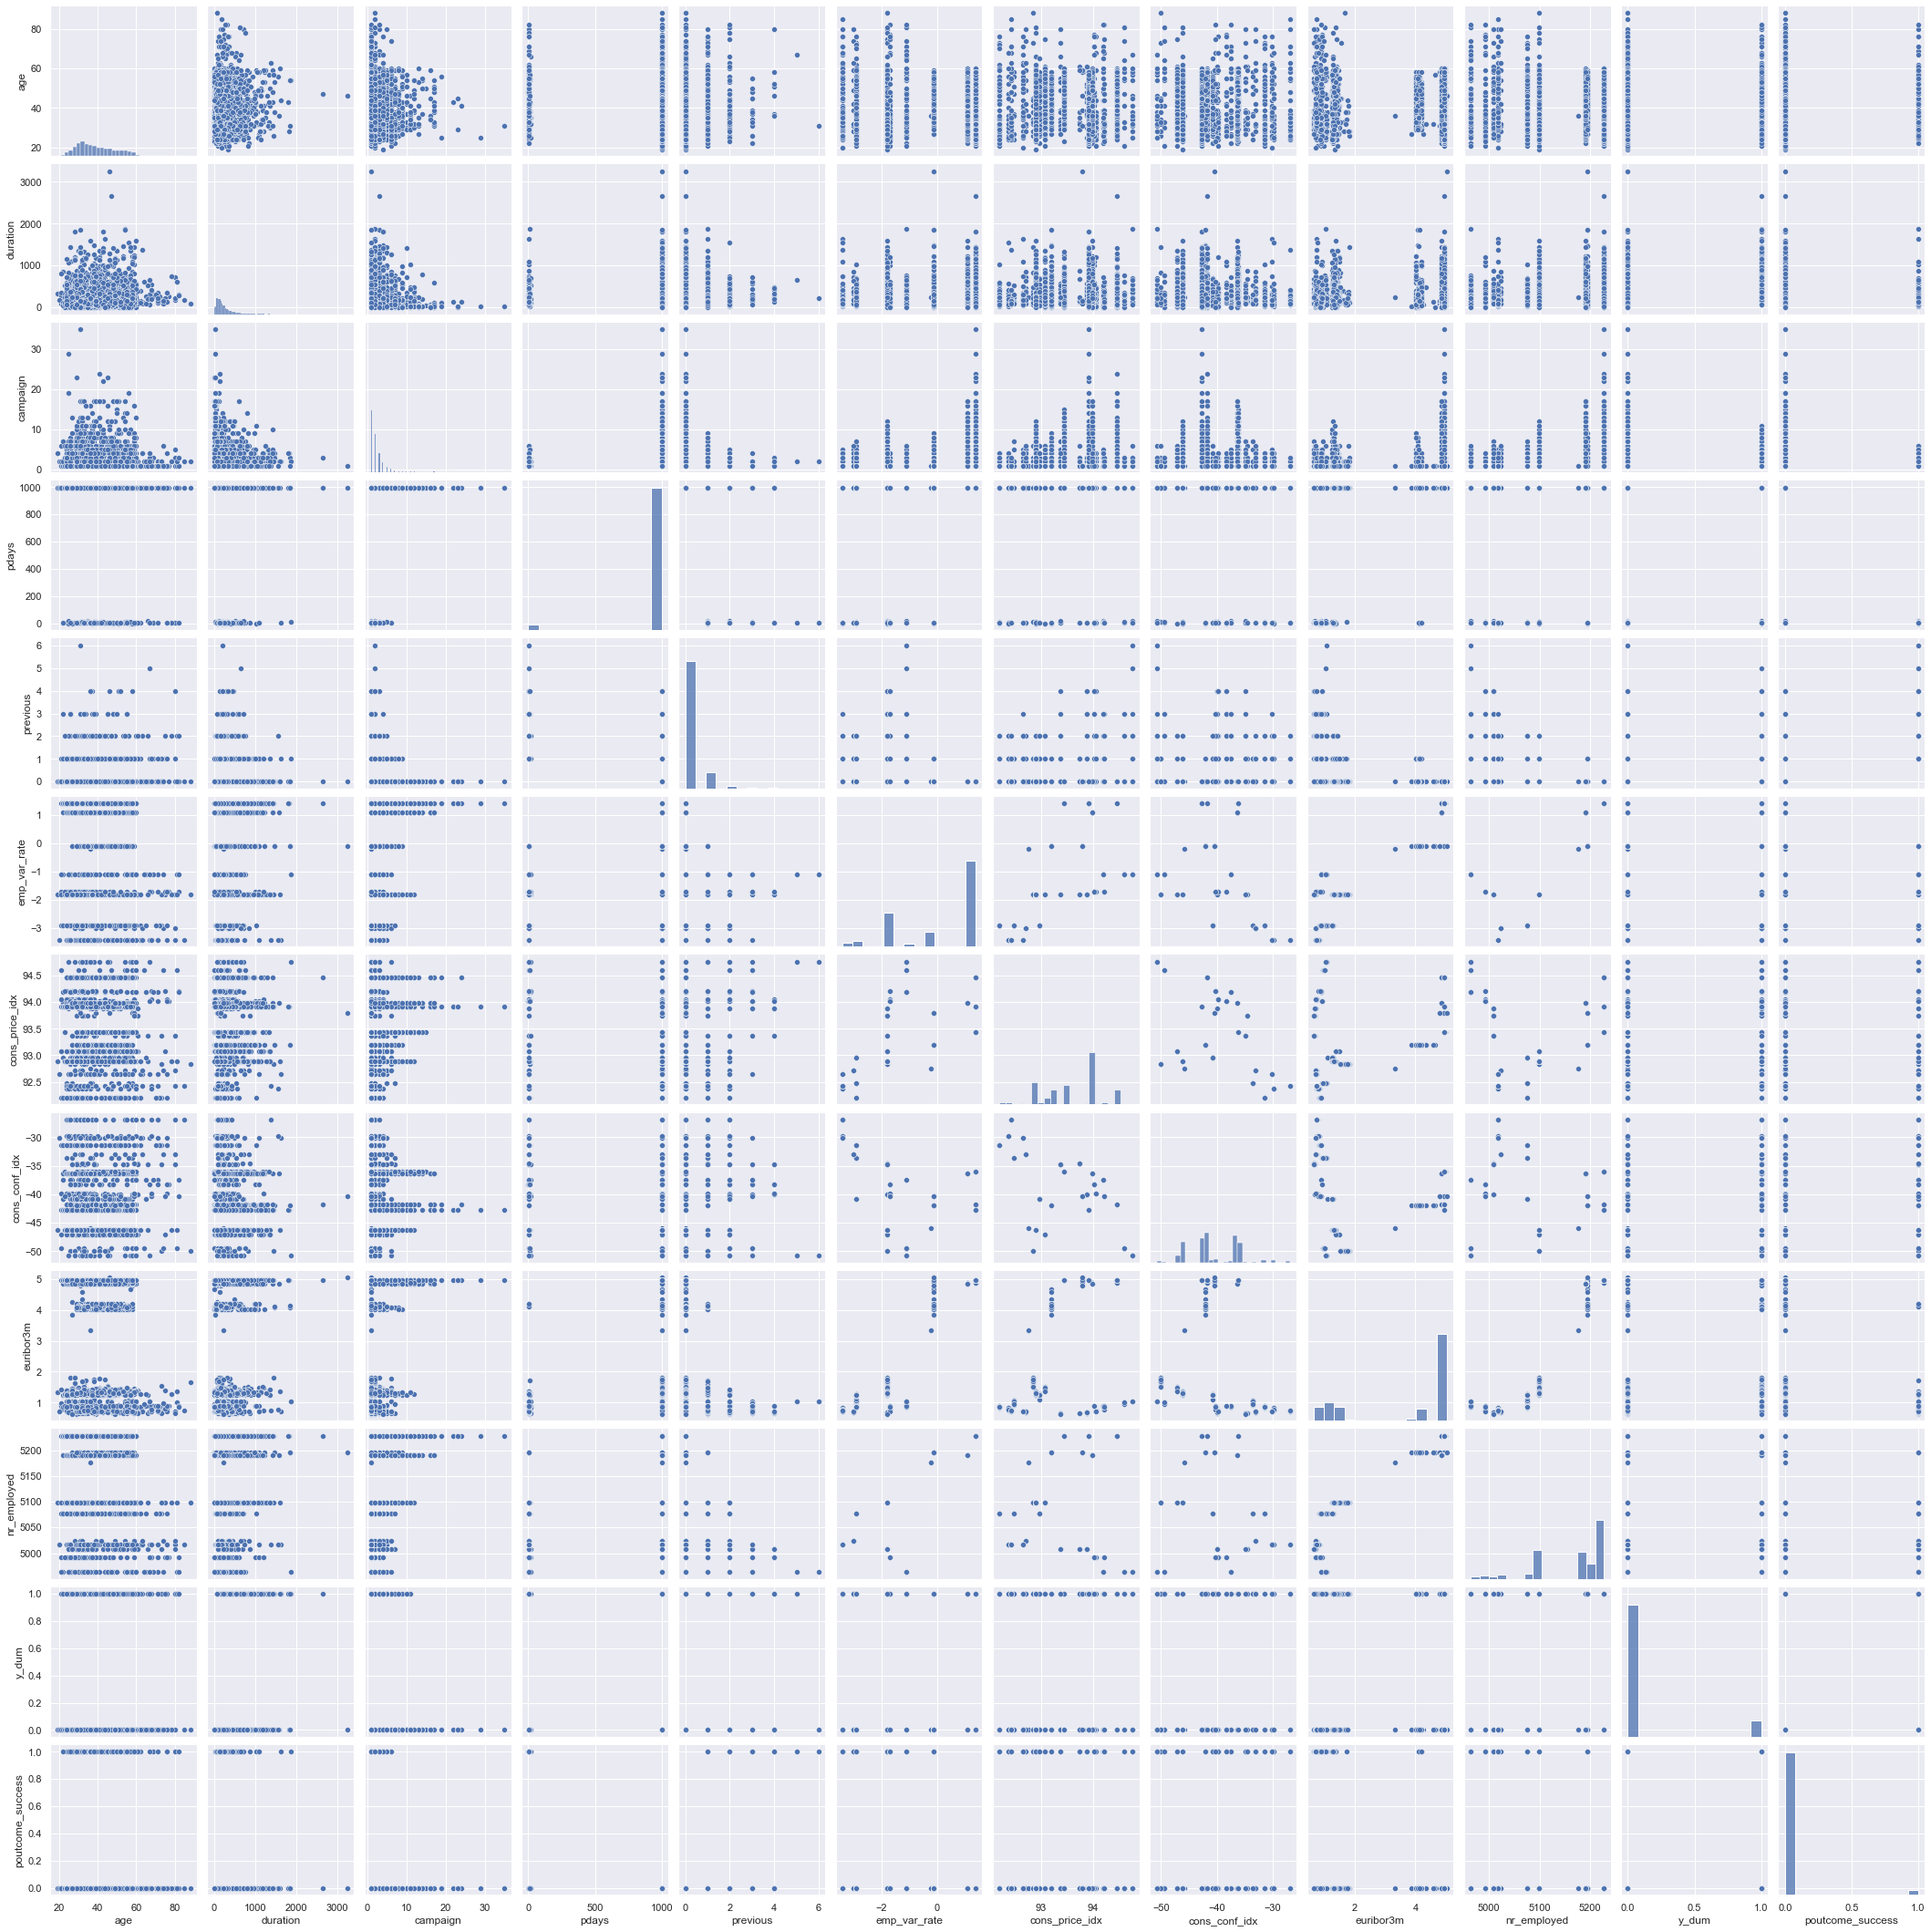

In [57]:
sns.pairplot(train)

In [36]:
model1 = smf.logit('y_dum~age', data = train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.341328
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3047
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                0.002290
Time:                        21:24:31   Log-Likelihood:                -1040.7
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                   0.02883
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6072      0.234    -11.128      0.000      -3.066      -2.148
age            0.0122      0.006      2.209      0.027       0.001       0.023
==============================================================================
"""

<AxesSubplot:xlabel='age', ylabel='y_dum'>

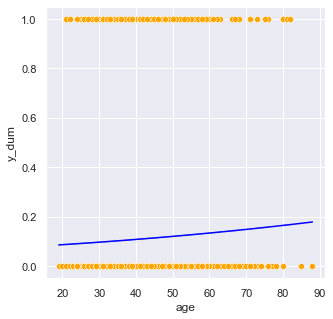

In [37]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x = 'age', y = 'y_dum', data = train, color = 'orange') #Visualizing data
sns.lineplot(x = 'age', y= model1.predict(data), data = train, color = 'blue') #Visualizing model

Classification accuracy = 89.2%
Precision = nan%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%
ROC-AUC = 50.7%


/var/folders/ht/j6gz9n5n0xq4d5dkwjzmg9w80000gn/T/ipykernel_39488/3276756329.py:17: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])


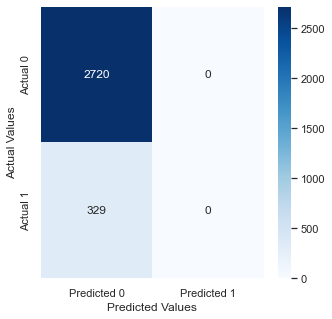

In [38]:
confusion_matrix_data(train,train.y_dum,model1,0.3)

Optimization terminated successfully.
         Current function value: 0.336448
         Iterations 6


-1025.837884463569

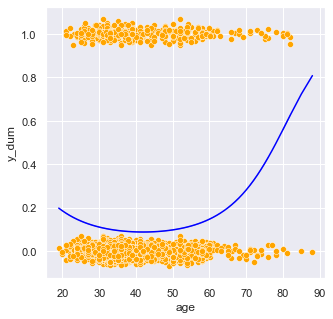

In [117]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.age,0), y = jitter(data.y_dum,0), data = train, color = 'orange')
model1_cubic = smf.logit(formula = 'y_dum~age+I(age**2)+I(age**3)', data = train).fit()
sns.lineplot(x = 'age', y= model1_quadra.predict(data), data = train, color = 'blue') 
model1_quadra.llf

Classification accuracy = 89.1%
Precision = 44.8%
TPR or Recall = 4.0%
FNR = 96.0%
FPR = 0.6%
ROC-AUC = 56.8%


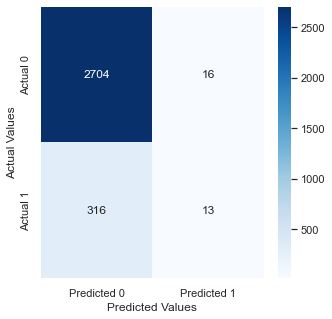

In [118]:
confusion_matrix_data(train,train.y_dum,model1_quadra,0.3)

In [41]:
#try interacting education, housing, and loan
model2 = sm.logit(formula = 'y_dum~age+job+marital+education*housing*loan+contact+month+day_of_week+campaign+pdays+previous+poutcome+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.266866
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3011
Method:                           MLE   Df Model:                           37
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.2199
Time:                        21:24:36   Log-Likelihood:                -813.67
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 3.411e-74
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          -249.0860    117.305     -2.123      0.034    -478.999     -19.173
job[T.Unemployed]                                     0.0553      0.203      0.272      0.785      -0.342       0.453
marital[T.single]                                     0.0345      0.143      0.241      0.809      -0.246       0.315
education[T.Secondary]                               -0.2471      0.260     -0.949      0.342      -0.757       0.263
education[T.Tertiary]                                -0.1593      0.271     -0.589      0.556      -0.690       0.371
housing[T.yes]                                       -0.7046      0.294     -2.399      0.016      -1.280      -0.129
loan[T.yes]                                          -0.0981      0.485     -0.202      0.840      -1.049       0.853
contact[T.telephone]                                 -1.3203      0.298     -4.426      0.000      -1.905      -0.736
month[T.aug]                                          0.2378      0.429      0.555      0.579      -0.603       1.078
month[T.dec]                                          0.5790      0.717      0.808      0.419      -0.826       1.984
month[T.jul]                                          0.1711      0.376      0.455      0.649      -0.567       0.909
month[T.jun]                                          0.2603      0.432      0.603      0.547      -0.586       1.107
month[T.mar]                                          2.1487      0.535      4.019      0.000       1.101       3.197
month[T.may]                                          0.0578      0.312      0.185      0.853      -0.553       0.669
month[T.nov]                                         -0.0409      0.421     -0.097      0.923      -0.866       0.784
month[T.oct]                                          0.5552      0.532      1.044      0.297      -0.487       1.598
month[T.sep]                                          0.2791      0.604      0.462      0.644      -0.904       1.463
day_of_week[T.mon]                                    0.1676      0.212      0.789      0.430      -0.249       0.584
day_of_week[T.thu]                                   -0.0379      0.221     -0.171      0.864      -0.471       0.396
day_of_week[T.tue]                                    0.1759      0.218      0.806      0.420      -0.252       0.604
day_of_week[T.wed]                                    0.1265      0.225      0.562      0.574      -0.315       0.568
poutcome[T.success]                                   1.7918      0.800      2.240      0.025       0.224       3.359
education[T.Secondary]:housing[T.yes]                 0.6449      0.381      1.694      0.090      -0.101       1.391
education[T.Tertiary]:housing[T.yes]                  0.7943      0.377      2.108      0.035       0.056       1.533
education[T.Secondary]:loan[T.yes]                   -0

Classification accuracy = 89.5%
Precision = 51.7%
TPR or Recall = 45.3%
FNR = 54.7%
FPR = 5.1%
ROC-AUC = 80.0%


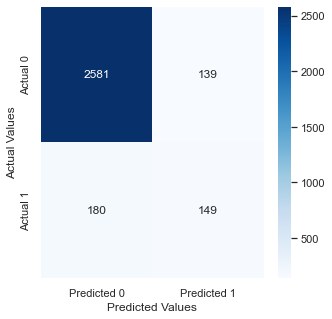

In [42]:
confusion_matrix_data(train,train.y_dum,model2,0.3)

In [113]:
model5 = smf.logit('y_dum~previous', data = train).fit()
model5.summary()

Optimization terminated successfully.
         Current function value: 0.318947
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3047
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                 0.06771
Time:                        23:13:34   Log-Likelihood:                -972.47
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 1.417e-32
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4097      0.069    -35.112      0.000      -2.544      -2.275
previous       1.0306      0.088     11.654      0.000       0.857       1.204
==============================================================================
"""

<AxesSubplot:xlabel='previous', ylabel='y_dum'>

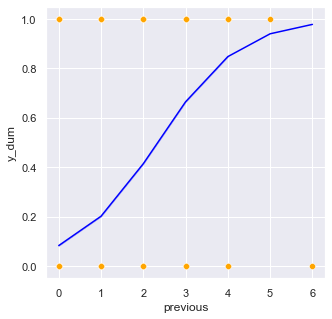

In [123]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x = 'previous', y = 'y_dum', data = train, color = 'orange') #Visualizing data
sns.lineplot(x = 'previous', y= model5.predict(data), data = train, color = 'blue') #Visualizing model

Optimization terminated successfully.
         Current function value: 0.318448
         Iterations 6


-970.946935187151

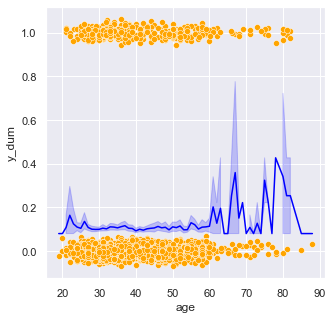

In [124]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.age,0), y = jitter(data.y_dum,0), data = train, color = 'orange')
model5_quadra= smf.logit(formula = 'y_dum~previous+I(previous**2)', data = train).fit()
sns.lineplot(x = 'age', y= model5_quadra.predict(data), data = train, color = 'blue') 
model5_quadra.llf

Optimization terminated successfully.
         Current function value: 0.317692
         Iterations 6


-968.644268313845

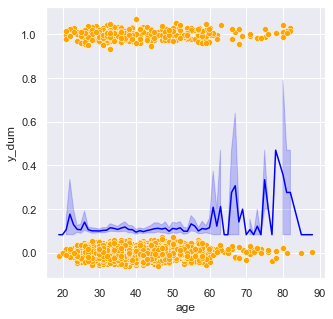

In [121]:
def jitter(values,j):
    return values + np.random.normal(j,0.02,values.shape)
sns.scatterplot(x = jitter(data.age,0), y = jitter(data.y_dum,0), data = train, color = 'orange')
model5_cubic= smf.logit(formula = 'y_dum~previous+I(previous**2)+I(previous**3)', data = train).fit()
sns.lineplot(x = 'age', y= model5_cubic.predict(data), data = train, color = 'blue') 
model5_cubic.llf


Classification accuracy = 89.4%
Precision = 53.5%
TPR or Recall = 14.0%
FNR = 86.0%
FPR = 1.5%
ROC-AUC = 62.3%


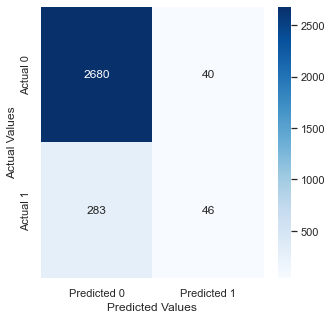

In [125]:
confusion_matrix_data(train,train.y_dum,model5_quadra,0.3)

Classification accuracy = 89.4%
Precision = 54.1%
TPR or Recall = 14.0%
FNR = 86.0%
FPR = 1.4%
ROC-AUC = 62.3%


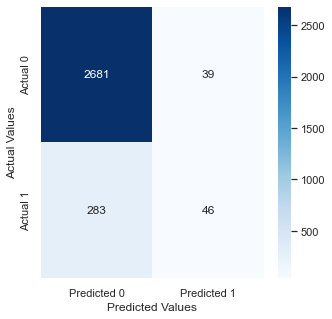

In [122]:
confusion_matrix_data(train,train.y_dum,model5_cubic,0.3)

In [126]:
model6 = smf.logit('y_dum~cons_conf_idx', data = train).fit()
model6.summary()

Optimization terminated successfully.
         Current function value: 0.340942
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3047
Method:                           MLE   Df Model:                            1
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                0.003419
Time:                        23:31:05   Log-Likelihood:                -1039.5
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                  0.007573
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.7595      0.505     -1.505      0.132      -1.749       0.230
cons_conf_idx     0.0337      0.013      2.680      0.007       0.009       0.058
=================================================================================
"""

<AxesSubplot:xlabel='cons_conf_idx', ylabel='y_dum'>

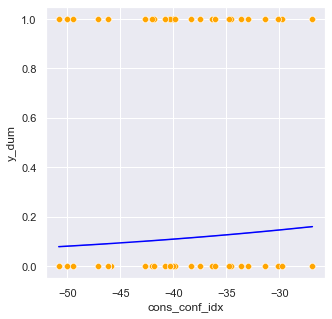

In [127]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(x = 'cons_conf_idx', y = 'y_dum', data = train, color = 'orange') #Visualizing data
sns.lineplot(x = 'cons_conf_idx', y= model6.predict(data), data = train, color = 'blue') #Visualizing model

Classification accuracy = 89.2%
Precision = nan%
TPR or Recall = 0.0%
FNR = 100.0%
FPR = 0.0%
ROC-AUC = 53.5%


/var/folders/ht/j6gz9n5n0xq4d5dkwjzmg9w80000gn/T/ipykernel_39488/3276756329.py:17: RuntimeWarning: invalid value encountered in double_scalars
  precision = (cm[1,1])/(cm[0,1]+cm[1,1])


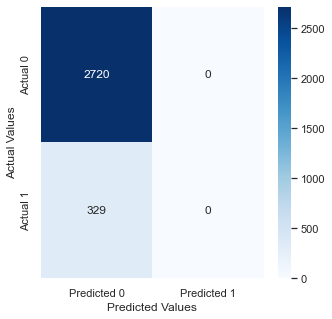

In [128]:
confusion_matrix_data(train,train.y_dum,model6,0.3)

Optimization terminated successfully.
         Current function value: 0.326543
         Iterations 7
Classification accuracy = 88.7%
Precision = 40.4%
TPR or Recall = 10.9%
FNR = 89.1%
FPR = 1.9%
ROC-AUC = 58.7%


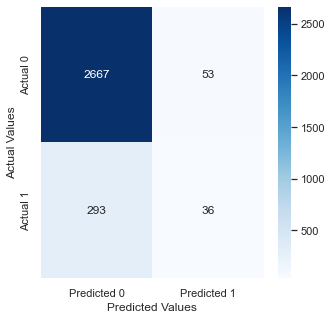

In [130]:
model6_cubic = smf.logit(formula = 'y_dum~cons_conf_idx+I(cons_conf_idx**2)+I(cons_conf_idx**3)', data = train).fit()
confusion_matrix_data(train,train.y_dum,model6_cubic,0.3)

Optimization terminated successfully.
         Current function value: 0.311871
         Iterations 6
Classification accuracy = 90.1%
Precision = 61.2%
TPR or Recall = 21.6%
FNR = 78.4%
FPR = 1.7%
ROC-AUC = 60.0%


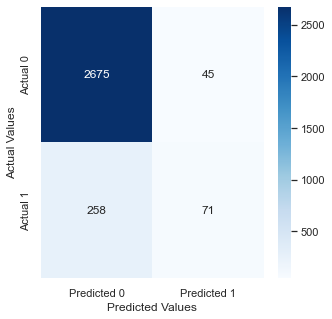

In [137]:
model7 = smf.logit(formula = 'y_dum~pdays', data = train).fit()
confusion_matrix_data(train,train.y_dum,model7,0.3)

Optimization terminated successfully.
         Current function value: 0.311832
         Iterations 5
Classification accuracy = 90.1%
Precision = 61.2%
TPR or Recall = 21.6%
FNR = 78.4%
FPR = 1.7%
ROC-AUC = 60.0%


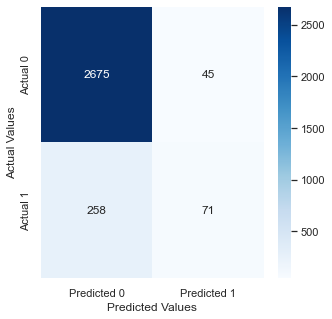

In [138]:
model7_quadra = smf.logit(formula = 'y_dum~pdays+I(pdays**2)', data = train).fit()
confusion_matrix_data(train,train.y_dum,model7_quadra,0.3)

Optimization terminated successfully.
         Current function value: 0.311826
         Iterations 4
Classification accuracy = 90.1%
Precision = 61.2%
TPR or Recall = 21.6%
FNR = 78.4%
FPR = 1.7%
ROC-AUC = 60.0%


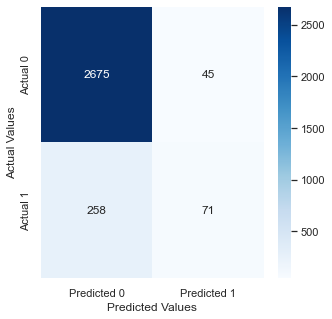

In [139]:
model7_cubic = smf.logit(formula = 'y_dum~pdays+I(pdays**2)+I(pdays**3)', data = train).fit()
confusion_matrix_data(train,train.y_dum,model7_cubic,0.3)

## Interactions

In [43]:
#try interacting education, housing, and loan; adding campaign and poutcome
model3 = sm.logit(formula = 'y_dum~age+job+marital+education*housing*loan+contact+month+day_of_week+campaign*poutcome+pdays+previous+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
model3.summary()

Optimization terminated successfully.
         Current function value: 0.266862
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3010
Method:                           MLE   Df Model:                           38
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.2200
Time:                        21:24:36   Log-Likelihood:                -813.66
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 1.197e-73
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          -248.2159    117.451     -2.113      0.035    -478.415     -18.017
job[T.Unemployed]                                     0.0546      0.203      0.269      0.788      -0.343       0.452
marital[T.single]                                     0.0346      0.143      0.242      0.809      -0.246       0.315
education[T.Secondary]                               -0.2481      0.260     -0.953      0.340      -0.758       0.262
education[T.Tertiary]                                -0.1613      0.271     -0.596      0.551      -0.692       0.369
housing[T.yes]                                       -0.7072      0.294     -2.404      0.016      -1.284      -0.131
loan[T.yes]                                          -0.0998      0.485     -0.206      0.837      -1.051       0.852
contact[T.telephone]                                 -1.3166      0.299     -4.402      0.000      -1.903      -0.730
month[T.aug]                                          0.2400      0.429      0.559      0.576      -0.601       1.081
month[T.dec]                                          0.5798      0.717      0.809      0.419      -0.825       1.985
month[T.jul]                                          0.1744      0.377      0.463      0.644      -0.564       0.913
month[T.jun]                                          0.2634      0.433      0.609      0.543      -0.584       1.111
month[T.mar]                                          2.1489      0.535      4.020      0.000       1.101       3.197
month[T.may]                                          0.0587      0.312      0.188      0.851      -0.552       0.670
month[T.nov]                                         -0.0386      0.421     -0.092      0.927      -0.864       0.787
month[T.oct]                                          0.5595      0.533      1.051      0.293      -0.484       1.603
month[T.sep]                                          0.2834      0.604      0.469      0.639      -0.901       1.468
day_of_week[T.mon]                                    0.1673      0.212      0.787      0.431      -0.249       0.584
day_of_week[T.thu]                                   -0.0377      0.221     -0.170      0.865      -0.471       0.396
day_of_week[T.tue]                                    0.1764      0.218      0.808      0.419      -0.251       0.604
day_of_week[T.wed]                                    0.1256      0.225      0.558      0.577      -0.316       0.567
poutcome[T.success]                                   1.8553      0.889      2.087      0.037       0.113       3.597
education[T.Secondary]:housing[T.yes]                 0.6471      0.381      1.699      0.089      -0.099       1.393
education[T.Tertiary]:housing[T.yes]                  0.7966      0.377      2.113      0.035       0.058       1.536
education[T.Secondary]:loan[T.yes]                   -0

Classification accuracy = 89.5%
Precision = 51.6%
TPR or Recall = 45.3%
FNR = 54.7%
FPR = 5.1%
ROC-AUC = 80.0%


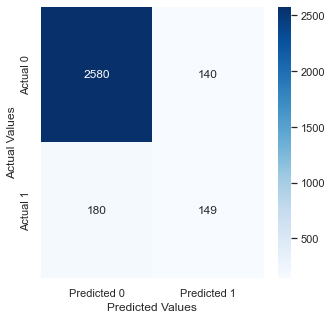

In [44]:
confusion_matrix_data(train,train.y_dum,model3,0.3)

In [45]:
#try interacting education, housing, and loan; adding pdays and poutcome
model4 = sm.logit(formula = 'y_dum~age+job+marital+education*housing*loan+contact+month+day_of_week+campaign+poutcome*pdays+previous+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
model4.summary()

Optimization terminated successfully.
         Current function value: 0.266782
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  y_dum   No. Observations:                 3049
Model:                          Logit   Df Residuals:                     3010
Method:                           MLE   Df Model:                           38
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.2202
Time:                        21:24:36   Log-Likelihood:                -813.42
converged:                       True   LL-Null:                       -1043.1
Covariance Type:            nonrobust   LLR p-value:                 9.568e-74
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                          -245.2450    117.365     -2.090      0.037    -475.276     -15.214
job[T.Unemployed]                                     0.0474      0.203      0.233      0.816      -0.351       0.446
marital[T.single]                                     0.0327      0.143      0.228      0.820      -0.248       0.313
education[T.Secondary]                               -0.2490      0.260     -0.958      0.338      -0.759       0.261
education[T.Tertiary]                                -0.1727      0.271     -0.636      0.525      -0.705       0.359
housing[T.yes]                                       -0.7159      0.294     -2.432      0.015      -1.293      -0.139
loan[T.yes]                                          -0.1054      0.486     -0.217      0.828      -1.057       0.846
contact[T.telephone]                                 -1.3121      0.298     -4.399      0.000      -1.897      -0.727
month[T.aug]                                          0.2365      0.429      0.551      0.581      -0.604       1.077
month[T.dec]                                          0.5947      0.715      0.832      0.406      -0.807       1.996
month[T.jul]                                          0.1824      0.376      0.485      0.628      -0.555       0.920
month[T.jun]                                          0.2707      0.432      0.626      0.531      -0.576       1.118
month[T.mar]                                          2.1625      0.534      4.051      0.000       1.116       3.209
month[T.may]                                          0.0550      0.312      0.176      0.860      -0.556       0.666
month[T.nov]                                         -0.0295      0.421     -0.070      0.944      -0.855       0.796
month[T.oct]                                          0.5628      0.532      1.058      0.290      -0.480       1.606
month[T.sep]                                          0.2456      0.607      0.405      0.686      -0.943       1.434
day_of_week[T.mon]                                    0.1604      0.213      0.754      0.451      -0.256       0.577
day_of_week[T.thu]                                   -0.0415      0.221     -0.188      0.851      -0.475       0.392
day_of_week[T.tue]                                    0.1716      0.218      0.786      0.432      -0.256       0.599
day_of_week[T.wed]                                    0.1229      0.225      0.546      0.585      -0.318       0.564
poutcome[T.success]                                   2.0570      0.883      2.330      0.020       0.327       3.787
education[T.Secondary]:housing[T.yes]                 0.6591      0.381      1.731      0.084      -0.087       1.406
education[T.Tertiary]:housing[T.yes]                  0.8106      0.378      2.145      0.032       0.070       1.551
education[T.Secondary]:loan[T.yes]                   -0

Classification accuracy = 89.5%
Precision = 51.7%
TPR or Recall = 45.3%
FNR = 54.7%
FPR = 5.1%
ROC-AUC = 80.0%


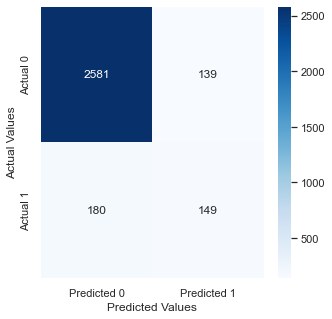

In [46]:
confusion_matrix_data(train,train.y_dum,model4,0.3)

Optimization terminated successfully.
         Current function value: 0.268626
         Iterations 9
Classification accuracy = 89.2%
Precision = 50.2%
TPR or Recall = 46.2%
FNR = 53.8%
FPR = 5.6%
ROC-AUC = 79.5%


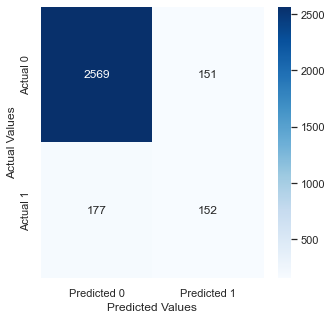

In [141]:
#interacting job and loan
model8 = sm.logit(formula = 'y_dum~age+job*loan+marital+education+housing+contact+month+day_of_week+campaign+poutcome+pdays+previous+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
confusion_matrix_data(train,train.y_dum,model8,0.3)

Optimization terminated successfully.
         Current function value: 0.268664
         Iterations 9
Classification accuracy = 89.2%
Precision = 50.2%
TPR or Recall = 46.2%
FNR = 53.8%
FPR = 5.6%
ROC-AUC = 79.4%


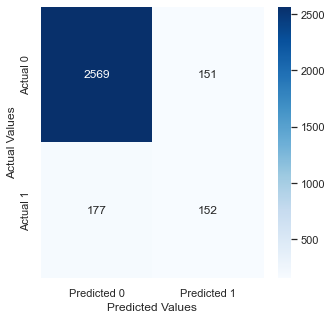

In [142]:
#interacting poutcome and loan
model9 = sm.logit(formula = 'y_dum~age+job+marital+education+housing+contact+month+day_of_week+campaign+poutcome*loan+pdays+previous+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
confusion_matrix_data(train,train.y_dum,model9,0.3)

Optimization terminated successfully.
         Current function value: 0.268611
         Iterations 9
Classification accuracy = 89.2%
Precision = 50.2%
TPR or Recall = 46.2%
FNR = 53.8%
FPR = 5.6%
ROC-AUC = 79.5%


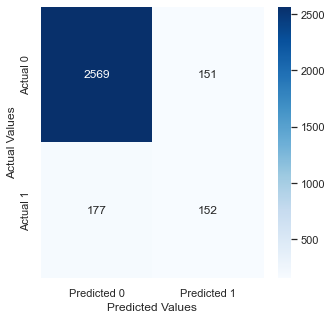

In [143]:
#integrating two interactions
model9 = sm.logit(formula = 'y_dum~age+job*loan+marital+education+housing+contact+month+day_of_week+campaign+loan*poutcome+pdays+previous+euribor3m+emp_var_rate+cons_price_idx+cons_conf_idx+nr_employed', data = train).fit()
confusion_matrix_data(train,train.y_dum,model9,0.3)